In [1]:
import torch
from torch import nn

torch.__version__

'2.2.0.dev20230922+cu121'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
!nvidia-smi

Mon Oct 16 01:54:57 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.99                 Driver Version: 536.99       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1080 Ti   WDDM  | 00000000:07:00.0  On |                  N/A |
| 40%   61C    P0              66W / 250W |   1718MiB / 11264MiB |      5%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
if not image_path.is_dir():
    image_path.mkdir(parents=True, exist_ok=True)
else:
    print(f"{image_path} directory exists, skipping folder creation.")
    pass

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading data...")
    f.write(request.content)
    print("Data downloaded...")

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Extracting data...")
    zip_ref.extractall(image_path)
    print("Data extracted...")


data\pizza_steak_sushi directory exists, skipping folder creation.
Data downloaded...
Extracting data...
Data extracted...


In [5]:
import os

def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [6]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

Random Image Path: data\pizza_steak_sushi\train\steak\3074367.jpg
Image class: steak
Image mode: RGB
Image size: (512, 339)


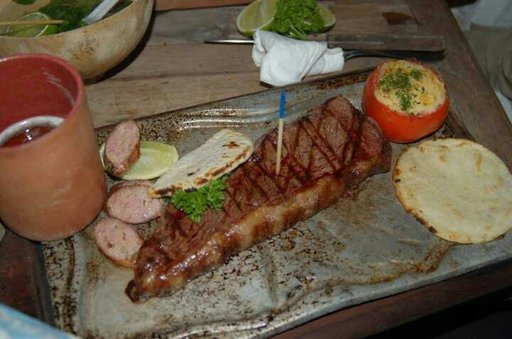

In [7]:
import random 
from PIL import Image

# random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
random_image_path

image_class = random_image_path.parent.name


img = Image.open(random_image_path)

print(f"Random Image Path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image mode: {img.mode}")
print(f"Image size: {img.size}")
img

Image Class: steak | Shape: (339, 512, 3) | Data Type: uint8


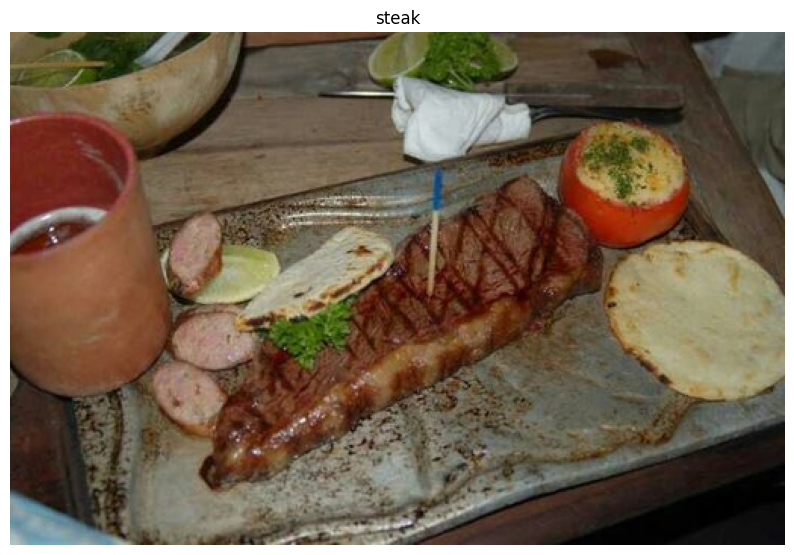

In [8]:
import numpy as np
import matplotlib.pyplot as plt

image_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(image_as_array)
plt.title(image_class)
plt.axis(False);
print(f"Image Class: {image_class} | Shape: {image_as_array.shape} | Data Type: {image_as_array.dtype}")

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

In [11]:
data_transform(img).shape

torch.Size([3, 64, 64])

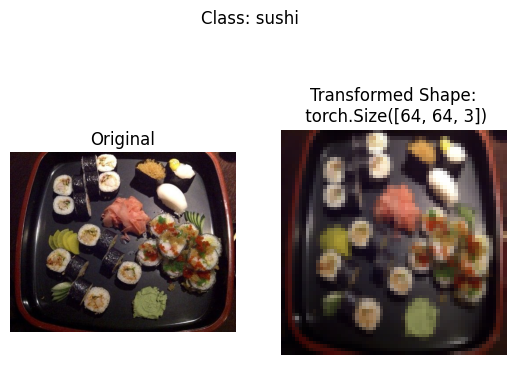

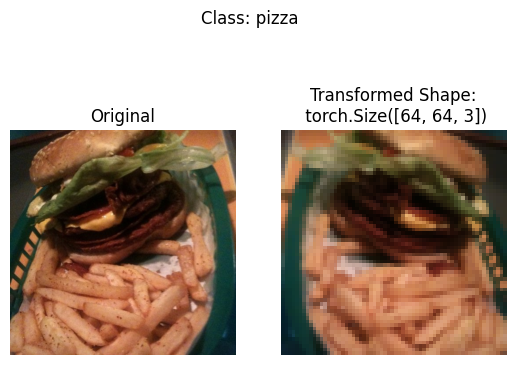

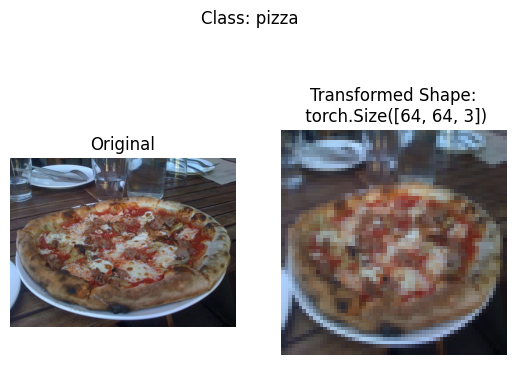

In [12]:
def plot_transform_images(image_paths, transform, n =3, seed=42):
    """
    Selects random images from a path of images and loads/transforms
    them then plots the original vs the transformer version
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title("Original")
            ax[0].axis("off")
            ax[1].imshow(transform(f).permute(1, 2, 0))
            ax[1].set_title("Transformed Shape:\n " + str(transform(f).permute(1, 2, 0).shape))
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.name}")

plot_transform_images(image_paths=image_path_list, transform=data_transform, n=3, seed=42)
            

In [13]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir, 
                                  transform=data_transform, 
                                  target_transform=None
                                  )

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform, 
                                 target_transform=None
                                 )

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [14]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [15]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [16]:
len(train_data), len(test_data)

(225, 75)

In [25]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image label: {class_names[label]}")
print(f"Label Datatype: {type(label)}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [C, H, W]
Permuted shape: torch.Size([64, 64, 3]) -> [H, W, C]


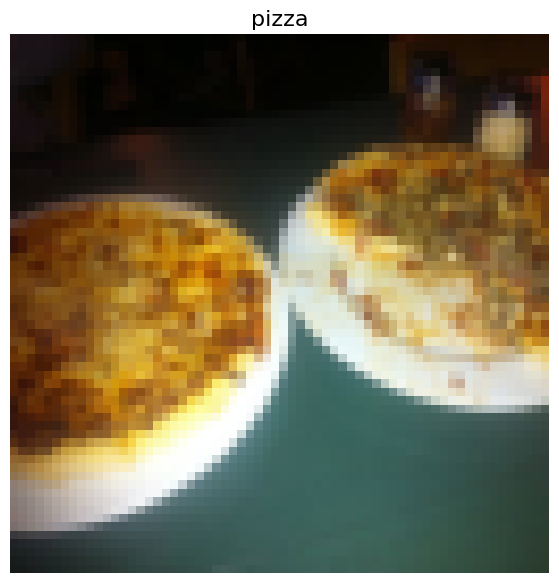

In [26]:
img_permute = img.permute(1, 2, 0)

print(f"Original shape: {img.shape} -> [C, H, W]")
print(f"Permuted shape: {img_permute.shape} -> [H, W, C]")

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.title(class_names[label], fontsize=16)
plt.axis(False);

In [27]:
import os
os.cpu_count()

12

In [30]:
from torch.utils.data import DataLoader


BATCH_SIZE = 1

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=1)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=1)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x24276e2ee50>,
 <torch.utils.data.dataloader.DataLoader at 0x24276e33090>)

In [31]:
len(train_dataloader), len(test_dataloader)

(225, 75)

Image shape: torch.Size([1, 3, 64, 64])
Image label: steak


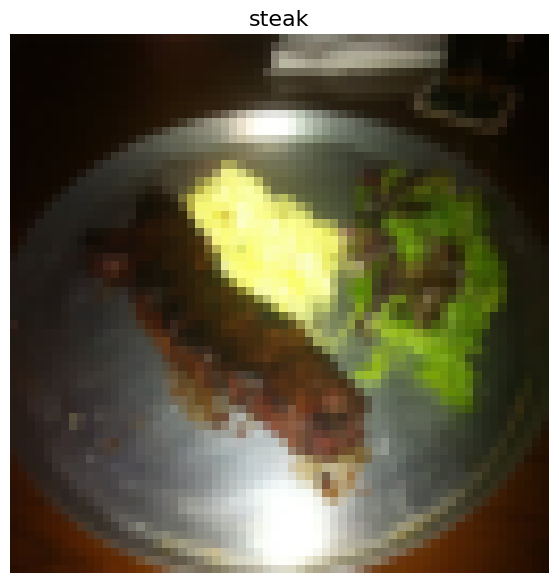

In [33]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape}")
print(f"Image label: {class_names[label]}")

plt.figure(figsize=(10, 7))
plt.imshow(img.squeeze().permute(1, 2, 0))
plt.title(class_names[label], fontsize=16)
plt.axis(False);

In [34]:
import os
import torch
import pathlib

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


In [35]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [40]:
target_directory = train_dir
print(f"Target dir: {target_directory}")

class_names_found = sorted(name for name in os.listdir(target_directory))
class_names_found

Target dir: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [41]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    if not classes:
        raise FileNotFoundError(f"Couldn't find any class folder in {directory}.")

    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

classes, class_to_idx = find_classes(target_directory)
print(f"Class names: {classes}")
print(f"Class to index: {class_to_idx}")

Class names: ['pizza', 'steak', 'sushi']
Class to index: {'pizza': 0, 'steak': 1, 'sushi': 2}


In [64]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir: str, transform=None) -> None:
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) 
        self.transform = transform

        self.classes, self.class_to_idx = find_classes(targ_dir)

    def load_image(self, index:int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        image = self.load_image(index)
        label = self.paths[index].parent.name # expects path to be of format data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[label]
        if self.transform:
            return self.transform(image), class_idx
        else:
            return image, class_idx

In [65]:
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [66]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, transform=test_transforms)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x242744fc850>,
 <__main__.ImageFolderCustom at 0x242744340d0>)

In [67]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [68]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [69]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [70]:
print(train_data.classes==train_data_custom.classes)
print(test_data.class_to_idx==test_data_custom.class_to_idx)

True
True


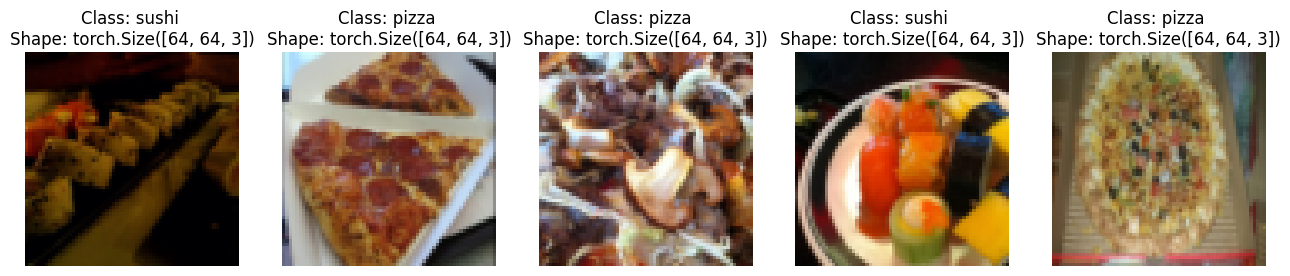

In [82]:
def display_random_images(
        dataset: torch.utils.data.Dataset, 
        classes: List[str]= None,
        n: int = 10,
        display_shape: bool = True,
        seed: int = None,
        ):
    if n >10:
        n = 10
    if seed:
        random.seed(seed)
    
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=(16,8))

    for i, targ_sample in enumerate(random_samples_idx):
        image, label = dataset[targ_sample]
        image_adjust = image.permute(1, 2, 0)
        plt.subplot(1, n, i + 1)
        plt.imshow(image_adjust) 
        if classes:
            title = f"Class: {classes[label]}"
            if display_shape:
                title += f" \nShape: {image_adjust.shape}"
            plt.title(title)
        plt.axis(False)
        
display_random_images(train_data_custom, classes=train_data_custom.classes, n=5)